In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# raw_df has the data in 2 rows for each real row of data
# the first of the 2 rows contains all data needed for 11 columns
# the second of the 2 rows only contains needed data for 3 columns
# hstack takes these two buckets of data and combines then horizontally into 1 long row of columns
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
feature_names = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT", "MEDV"]
df = pd.DataFrame(data, columns=feature_names)

In [2]:
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
df.shape

(506, 14)

In [6]:
import statsmodels.api as sm

bos_X = df.drop(["MEDV"], axis=1)
bos_X = sm.add_constant(bos_X)
bos_y = df["MEDV"]

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [8]:
# split the data
bos_X_train, bos_X_test, bos_y_train, bos_y_test = train_test_split(bos_X, bos_y, test_size=0.3, random_state=42)

In [9]:
# take the original box_X dataset and scale the data with mean 0 and std 1 for each column
bos_sX = StandardScaler().fit_transform(bos_X)

In [10]:
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = train_test_split(bos_sX, bos_y, test_size=0.3, random_state=42)

In [11]:
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(bos_X_train, bos_y_train)
dr.score(bos_X_test, bos_y_test)

-0.03469753992352409

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state=42, n_estimators=100)
rfr.fit(bos_X_train, bos_y_train)

RandomForestRegressor(random_state=42)

### Metrics

In [13]:
from sklearn import metrics
rfr.score(bos_X_test, bos_y_test)


0.8706796301306422

In [14]:
bos_y_test_pred = rfr.predict(bos_X_test)

In [15]:
metrics.r2_score(bos_y_test, bos_y_test_pred)

0.8706796301306422

In [16]:
metrics.explained_variance_score(bos_y_test, bos_y_test_pred)

0.870961590495489

In [17]:
metrics.mean_absolute_error(bos_y_test, bos_y_test_pred)

2.079592105263157

In [18]:
metrics.mean_squared_error(bos_y_test, bos_y_test_pred)

9.63606107894737

In [19]:
metrics.mean_squared_log_error(bos_y_test, bos_y_test_pred)

0.021520838442873252

### Residuals Plot

C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


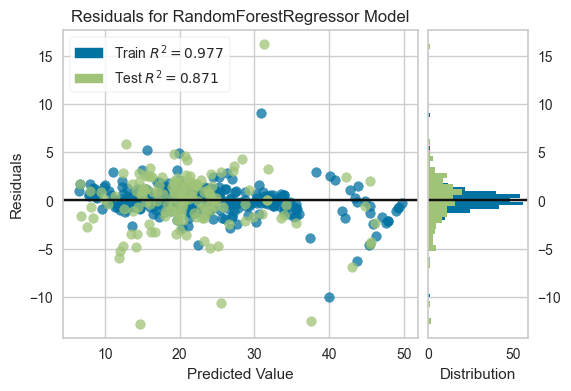

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
from yellowbrick.regressor import ResidualsPlot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
rpv = ResidualsPlot(rfr)
rpv.fit(bos_X_train, bos_y_train)
rpv.score(bos_X_test, bos_y_test)
rpv.poof()

### Heteroscedasticity

In [25]:
import statsmodels.stats.diagnostic as sms

resids = bos_y_test - rfr.predict(bos_X_test)

# make sure to add a constant (add_constant) to the X data behind bos_X_test to get this to work
hb = sms.het_breuschpagan(resids, bos_X_test)
labels = [
        "Lagrange multiplier statistic",
        "p-value",
        "f-value",
        "f p-value"
    ]
for name, num in zip(labels, hb):
    print(f"{name}: {num:.2}")

Lagrange multiplier statistic: 2.2e+01
p-value: 0.056
f-value: 1.8
f p-value: 0.049


### Normal Residuals
 * Testing whether the residuals are normal


<Axes: title={'center': 'Residual Histogram'}, ylabel='Frequency'>

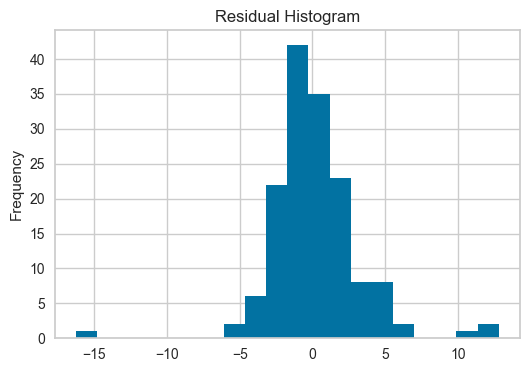

In [27]:
fig, ax = plt.subplots(figsize=(6,4))
resids = bos_y_test - rfr.predict(bos_X_test)
pd.Series(resids, name="residuals").plot.hist(
    bins=20, ax=ax, title="Residual Histogram")

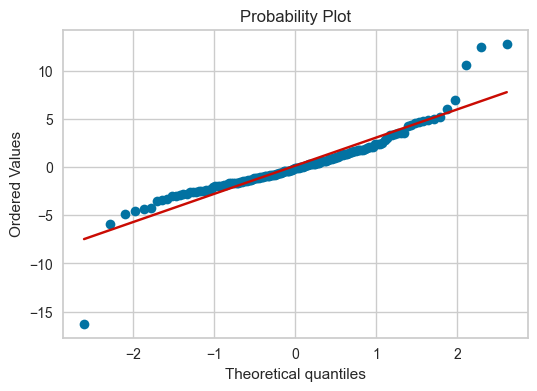

In [28]:
from scipy import stats
fig, ax = plt.subplots(figsize=(6,4))
_ = stats.probplot(resids, plot=ax)

In [31]:
# Kolmogorov-Smirnov test for normality if residuals.
# pvalue should be > 0.05 to be normal, if p < 0.05 then values are not normal
stats.kstest(resids, cdf="norm")

KstestResult(statistic=0.2005666946232286, pvalue=7.77497247246533e-06, statistic_location=-1.4819999999999993, statistic_sign=1)

### Prediction Error Plot

C:\Users\timry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


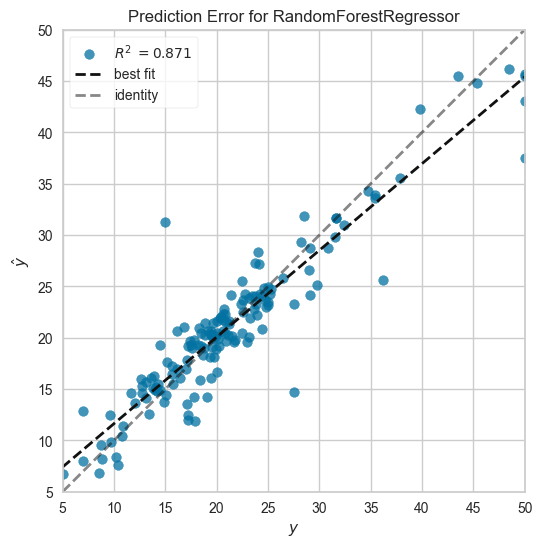

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [29]:
from yellowbrick.regressor import PredictionError

fig, ax = plt.subplots(figsize=(6,6))
pev = PredictionError(rfr)
pev.fit(bos_X_train, bos_y_train)
pev.score(bos_X_test, bos_y_test)
pev.poof()